In [10]:
%pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd() / "data-science-regression-model"
sys.path.insert(0, str(PROJECT_ROOT))




[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:

DATA_PATH = "/Users/omxr/Desktop/VSCodeProjects/5CCSAMLF/data-science-regression-model/data/CW1_train.csv"
df = pd.read_csv(DATA_PATH)
df.head(20) 


,outcome,carat,cut,color,clarity,depth,table,price,x,y,z,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,4.18,0.709585,0.385796,0.267058,0.500222,0.462145,0.806922,0.891912,0.276683,0.967510,0.131087,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,2.83,0.649532,0.037578,0.618528,0.052079,0.008600,0.496153,0.092878,0.089039,0.321334,0.549223,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,3.10,0.550496,0.029469,0.350697,0.131802,0.317685,0.821415,0.581294,0.876056,0.743479,0.916367,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,3.50,0.982447,0.487176,0.339991,0.232601,0.267207,0.800913,0.984788,0.070506,0.528945,0.005256,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,3.77,0.030877,0.818540,0.955872,0.923147,0.861377,0.997349,0.091662,0.781069,0.019354,0.522191,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813
5,5.613434,1.52,Ideal,I,VS1,60.7,60.0,10392,7.40,7.42,4.50,0.500066,0.970733,0.404171,0.272470,0.613256,0.389534,0.262332,0.953015,0.377254,0.153582,0.747348,-1.212447,-1.318956,0.352356,-0.498601,0.904013,-0.150079,0.087298,0.207368,2.513739
6,19.709748,0.31,Very Good,H,SI1,60.5,60.0,446,4.33,4.40,2.64,0.489517,0.623057,0.250959,0.725926,0.824579,0.319139,0.687657,0.708370,0.259427,0.857805,1.699251,0.932615,0.282628,-0.364400,-0.089308,0.023200,-0.473264,-0.188567,-1.140664,-0.763866
7,-1.408018,0.57,Ideal,E,VVS2,62.3,54.0,2615,5.30,5.35,3.32,0.689498,0.169699,0.935762,0.358675,0.060398,0.585043,0.353002,0.180173,0.036187,0.466199,-2.026348,-1.987253,0.002764,0.898449,0.570828,1.898563,2.024281,0.353185,-1.283709,-1.033749
8,-12.536959,0.72,Very Good,D,SI2,62.3,59.0,2612,5.67,5.73,3.55,0.433304,0.489373,0.448523,0.823878,0.784574,0.369434,0.688564,0.704058,0.615552,0.774504,-1.484685,0.360250,0.557480,1.987789,-0.197764,-0.131643,0.544689,-0.591229,0.681006,1.242101
9,-17.293657,1.02,Premium,H,VS2,62.5,60.0,5217,6.38,6.43,4.00,0.251411,0.322907,0.733124,0.583021,0.120566,0.136800,0.736569,0.462095,0.243979,0.163779,-0.268407,0.189259,1.318645,0.309236,0.374011,1.317873,0.118969,-0.650737,0.184025,-0.639316


In [12]:
df.shape
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outcome  10000 non-null  float64
 1   carat    10000 non-null  float64
 2   cut      10000 non-null  object 
 3   color    10000 non-null  object 
 4   clarity  10000 non-null  object 
 5   depth    10000 non-null  float64
 6   table    10000 non-null  float64
 7   price    10000 non-null  int64  
 8   x        10000 non-null  float64
 9   y        10000 non-null  float64
 10  z        10000 non-null  float64
 11  a1       10000 non-null  float64
 12  a2       10000 non-null  float64
 13  a3       10000 non-null  float64
 14  a4       10000 non-null  float64
 15  a5       10000 non-null  float64
 16  b1       10000 non-null  float64
 17  b2       10000 non-null  float64
 18  b3       10000 non-null  float64
 19  b4       10000 non-null  float64
 20  b5       10000 non-null  float64
 21  a6       1000

outcome    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
b5         0
a6         0
a7         0
a8         0
a9         0
a10        0
b6         0
b7         0
b8         0
b9         0
b10        0
dtype: int64

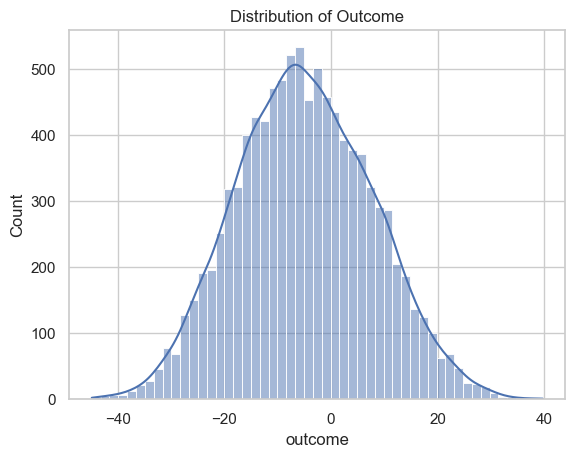

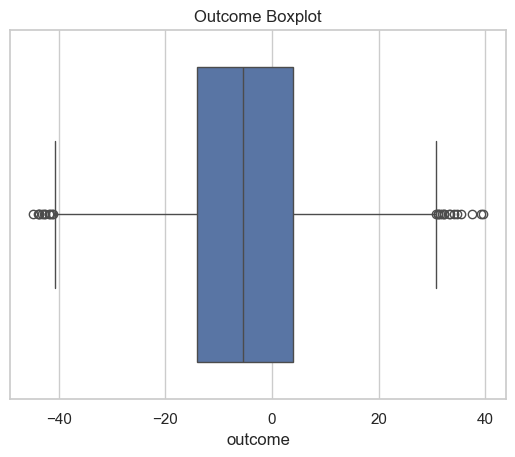

In [13]:
sns.histplot(df["outcome"], kde=True)
plt.title("Distribution of Outcome")
plt.show()
sns.boxplot(x=df["outcome"])
plt.title("Outcome Boxplot")
plt.show()


In [14]:
from src.preprocessing import make_preprocessor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X = df.drop(columns="outcome")
y = df["outcome"]

pipe = Pipeline([
    ("preprocess", make_preprocessor(df)),
    ("model", LinearRegression())
])

pipe.fit(X, y)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


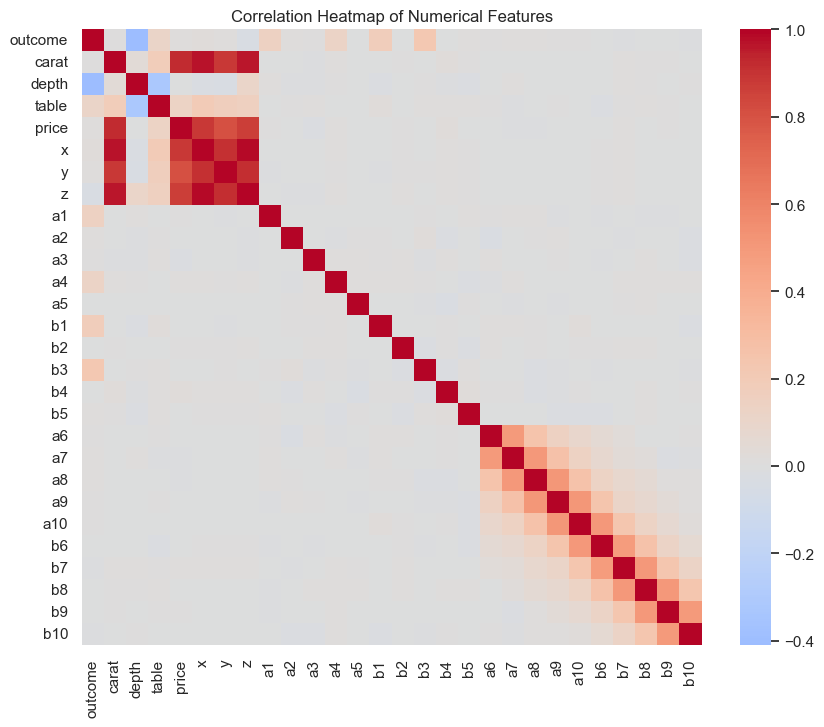

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [15]:
import os, sys
print(os.getcwd())
print(sys.path[:3])


/Users/omxr/Desktop/VSCodeProjects/5CCSAMLF
['/Users/omxr/Desktop/VSCodeProjects/5CCSAMLF/data-science-regression-model', '/Users/omxr/Desktop/VSCodeProjects/5CCSAMLF/data-science-regression-model', '/Users/omxr/opt/anaconda3/envs/agap/lib/python310.zip']
